this problem is a simple regression problem of predicting the salary of an induvidual with using one feature, experience years

LOADING DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
dataset = pd.read_csv('Salary_Data.csv')
dataset.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

DATA PREPROCESSING

In [2]:
#splitting feature and target cols
X = dataset.iloc[:,:-1].values  
y = dataset.iloc[:,1].values  

for using linear regression, the feature variable and target variable should have a corelation > 0.6, I have used spearman's corelation coefficient in this case

In [4]:
from scipy.stats import spearmanr
corr, _ = spearmanr(X, y)
print('correlation: %.3f' % corr)

Spearmans correlation: 0.957


In [5]:
#splitting train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.75,random_state=0)

MODEL TRAINING

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) 

LinearRegression()

VISUALISATION OF THE REGRESSION LINE 

In [11]:
y_pred = regressor.predict(X_test) 
y_pred

array([ 39390.67454324, 119914.17685749,  63181.7093179 ,  61351.62971985,
       112593.85846529, 105273.54007308, 113508.89826431,  62266.66951888,
        74162.18690621,  97953.22168088,  52201.2317296 ,  72332.10730816,
        54946.35112667,  66841.86851401, 100698.34107795,  87887.7838916 ,
        37560.59494519, 121744.25645554,  53116.27152862,  45795.95313642,
        79652.42570037,  80567.46549939,  59521.5501218 ])

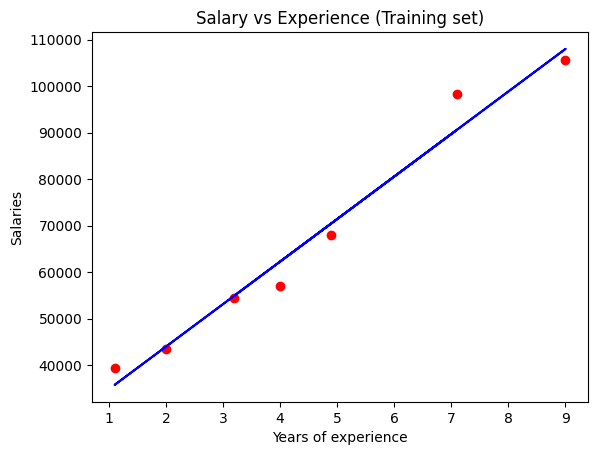

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of experience")
plt.ylabel("Salaries")
plt.show()

MODEL EVALUATION using R-square 

In [13]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred) 
print('r2 score: ', r2) 

r2 score:  0.9448084643969682


In [16]:
regressor.coef_

array([9150.39799026])

In [17]:
regressor.intercept_

25665.077557856283

MODEL INTERPRETATION

=> slope of the equation is 9150.394.. which means that increase in 1 year of experience increases the salary by 9150... times


=> the intercept can be interpreted as the average salsry of a fresher/a person with 0 experience